<big> <big> Analiza eksploracyjna oraz testy statystyczne danych dotyczących sprzedaży gier video </big> </big>
<big> <br> Dawid Bosy nr indeksu 145396

Poniższa analiza jest stworzona na danych dotyczących sprzedaży gier wideo, które osiągnęły wynik sprzedażowy powyżej 100 000 kopii. Dane są dostępne pod linkiem https://www.kaggle.com/gregorut/videogamesales i zostały wygenerowane na podstawie informacji od serwisu vgchartz.com. Zawierają informacje o nazwie gry, platformie na którą została wydana (m.in. PC, Playstation, Xbox ), roku wydania, gatunku, wydawnictwie, oraz sprzedaży w Europie, Północnej Ameryce, oraz Japonii.

In [2]:
file <- read.csv("C:\\Users\\Dawid\\Downloads\\vgsales.csv")

In [11]:
file

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<big> 1.Podstawowe wykresy i analiza </big>

Porównanie sprzedaży

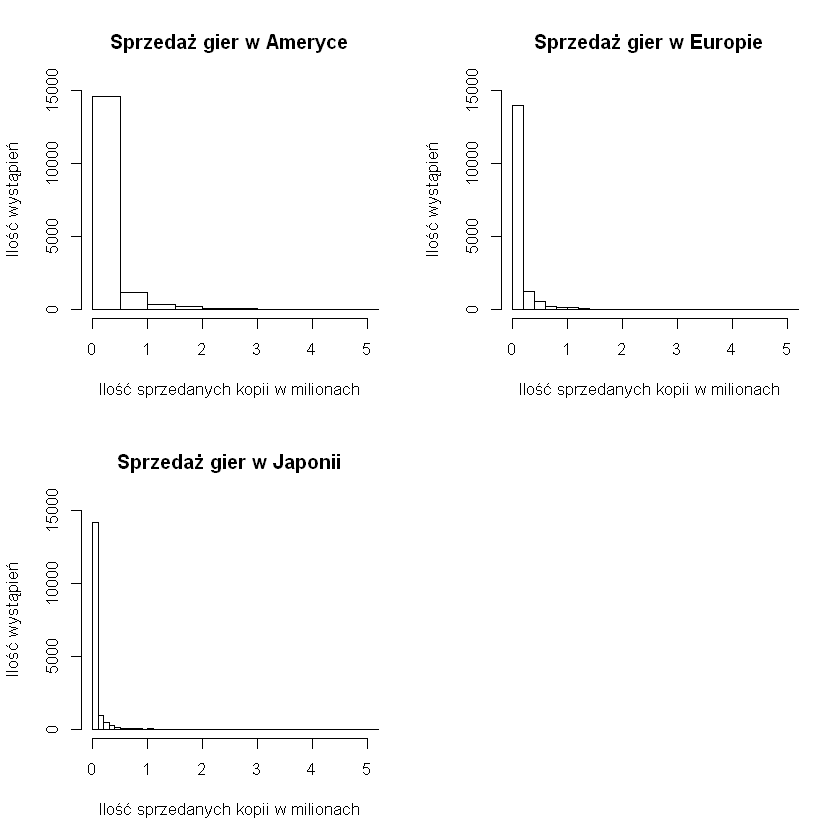

In [38]:
par(mfrow=c(2,2))
hist(file$NA_Sales,main="Sprzedaż gier w Ameryce",xlab="Ilość sprzedanych kopii w milionach",xlim=c(0,5),ylim=c(0,15000),ylab="Ilość wystąpień",breaks=sqrt(nrow(file)))
hist(file$EU_Sales,main="Sprzedaż gier w Europie",xlab="Ilość sprzedanych kopii w milionach",xlim=c(0,5),ylim=c(0,15000),ylab="Ilość wystąpień",breaks=sqrt(nrow(file)))
hist(file$JP_Sales,main="Sprzedaż gier w Japonii",xlab="Ilość sprzedanych kopii w milionach",xlim=c(0,5),ylim=c(0,15000),ylab="Ilość wystąpień",breaks=sqrt(nrow(file)))

In [50]:
mean(file$NA_Sales)
median(file$NA_Sales)
sum((file$NA_Sales-mean(file$NA_Sales))^4)/((length(file$NA_Sales)-1)*sd(file$NA_Sales)^4) #kurtoza
quantile(file$NA_Sales)
mean(file$EU_Sales)
median(file$EU_Sales)
sum((file$EU_Sales-mean(file$EU_Sales))^4)/((length(file$EU_Sales)-1)*sd(file$EU_Sales)^4)
quantile(file$EU_Sales)
mean(file$JP_Sales)
median(file$JP_Sales)
sum((file$JP_Sales-mean(file$JP_Sales))^4)/((length(file$JP_Sales)-1)*sd(file$JP_Sales)^4)
quantile(file$JP_Sales)

[1] 0.2646674

[1] 0.08

[1] 651.8951

0%   25%   50%   75%  100% 
 0.00  0.00  0.08  0.24 41.49

[1] 0.146652

[1] 0.02

[1] 758.754

0%   25%   50%   75%  100% 
 0.00  0.00  0.02  0.11 29.02

[1] 0.07778166

[1] 0

[1] 197.1632

0%   25%   50%   75%  100% 
 0.00  0.00  0.00  0.04 10.22

Na podstawie powyższych danych możemy zauważyć, że najwyższa średnia liczba sprzedanych kopii występuje w Ameryce. Dodatkowo histogramy pokazują, że bardzo mały procent gier odnosi ogromny sukces wielomilionowej sprzedaży, natomiast bardzo duża część nigdy do tej wartości się nawet nie zbliża. Na podstawie średnich i median możemy wywnioskować, że każda z danych dotyczących sprzedaży jest ostro lewoskośna, a kurtoza jest bardzo wysoka z powodu dużej różnicy w sprzedaży. 


      Action    Adventure     Fighting         Misc     Platform       Puzzle 
        3316         1286          848         1739          886          582 
      Racing Role-Playing      Shooter   Simulation       Sports     Strategy 
        1249         1488         1310          867         2346          681 

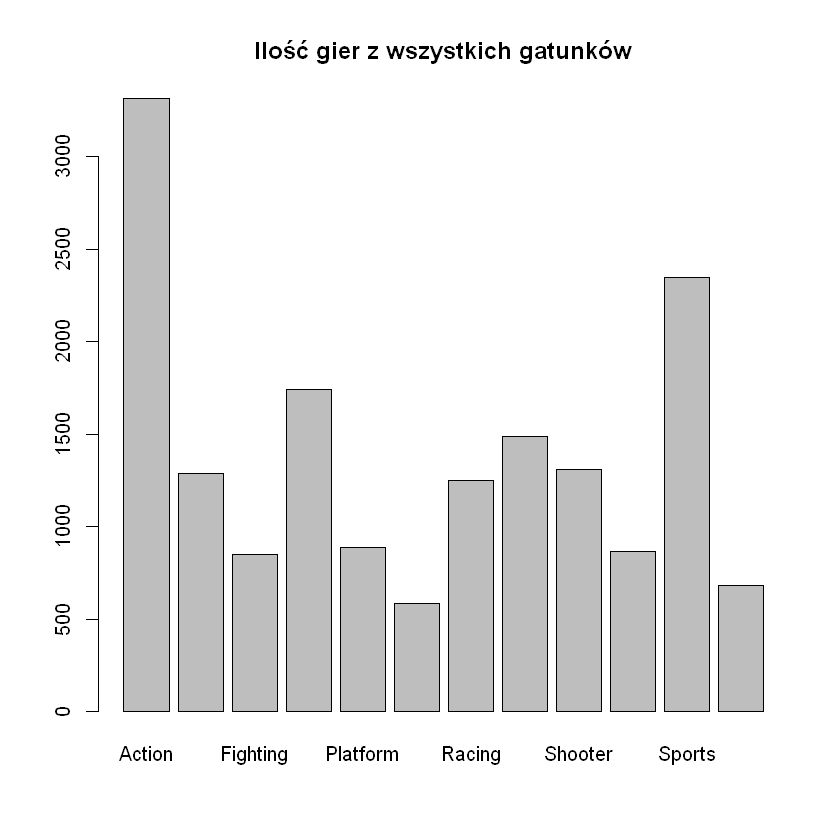

In [94]:
barplot(table(file$Genre),main ="Ilość gier z wszystkich gatunków")
table(file$Genre)

Zdecydowanie najwięcej produkowanych jest gier akcji oraz sportowych. Najrzadziej pojawiającym się gatunkiem są łamigłówki oraz bijatyki.

Najbardziej dominujące firmy na rynku

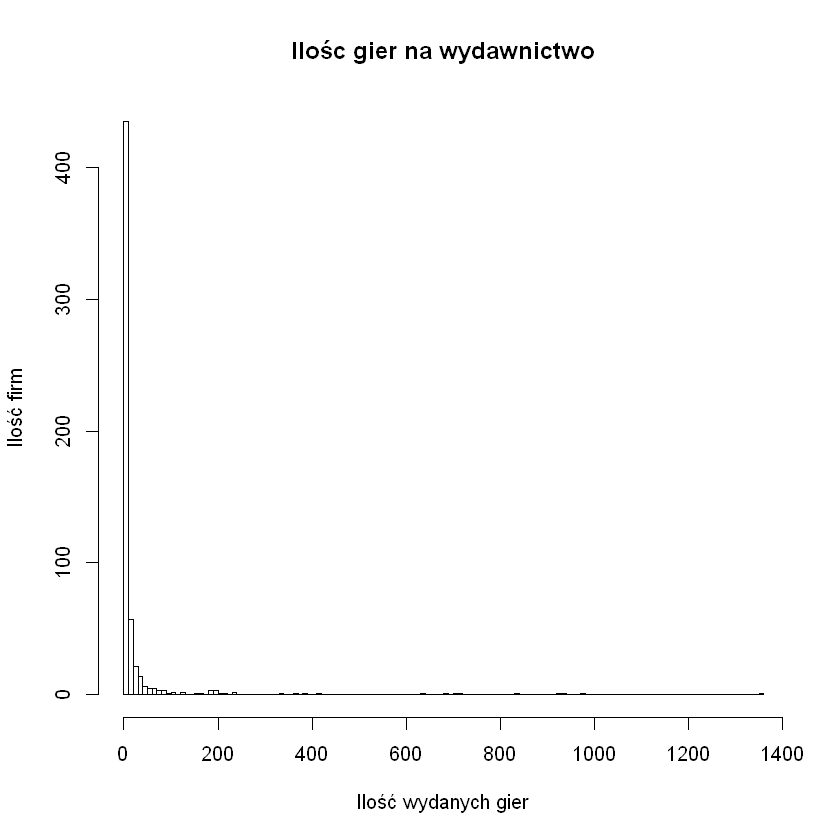

In [85]:
data <- table(file$Publisher)
hist(data,main="Ilośc gier na wydawnictwo",xlab="Ilość wydanych gier",ylab="Ilość firm",breaks=sqrt(nrow(file)))

Możemy zaobserwować, że rynek gier można podzielić na dwie skrajne części: gry wydawane przez największe wydawnictwa zarabiające nieporównywalnie dużo pieniędzy (gdzie gier tych jest stosunkowo bardzo niewiele) oraz ogromna ilość gier nieodnosząca większego sukcesu, będącymi wydawane przez małe wydawnictwa.

<big> <big>  2. Test T </big>

Test T został wybrany, ponieważ łatwo mogliśmy uzyskać informację o średnich jak i odchyleniu. Dodatkowo, rozkład wartości sprzedaży jest zbliżony do rozkładu normalnego, co jest niezbędne przy tym teście.

Na podstawie sprzedaży gier w poprzednich i następnych latach określić, czy ilość sprzedanych gier wydanych w 2016 roku odstaje od pozostałych lat, czy wynika ono z pobranej próby.

In [108]:
index <- sample(1:nrow(file),100) #próbka zmienia się za każdym razem!
all <- mean(file$Global_Sales[index]) #srednia próbki z całości
all
odchylenie <- sd(file$Global_Sales) #odchylenie standardowe
dane <- head(file[file[,"Year"] == 2016,],100) #wybranie próbki 100 gier z 2016 roku
oneYear <- mean(dane$Global_Sales) #średnia wybranej próbki
oneYear

[1] 0.6256

[1] 0.6051

<big> 1. Badana cecha jest zbliżona do rozkładu normalnego <br>
2.H0: u = 0.6051 <br>
H1: u != 0.6051 <br>
3. Poziom istotności a = 0.05 <br> 
Na jego podstawie wyznaczamy zbiór krytyczny, odczytując go z tabeli rozkładu T-studenta: <br>
Zbiór krytyczny: (-inf,-1.98) U (1.98,inf) <br>
4. Statystyka testowa: </big>

In [110]:
statystyka <- (all -
oneYear) /(odchylenie/sqrt(100))
statystyka

[1] 0.1318304

Wniosek:
Wartość statystyki należy do zbioru krytycznego - w takim wypadku odrzucamy hipotezę zerową. Oznacza to, że rok 2016 faktycznie był ponadprzeciętny w historii gier, notując lepsze wyniki sprzedażowe, średnio aż o 40 tys. dolarów.

<big> <big> 3. Korelacja

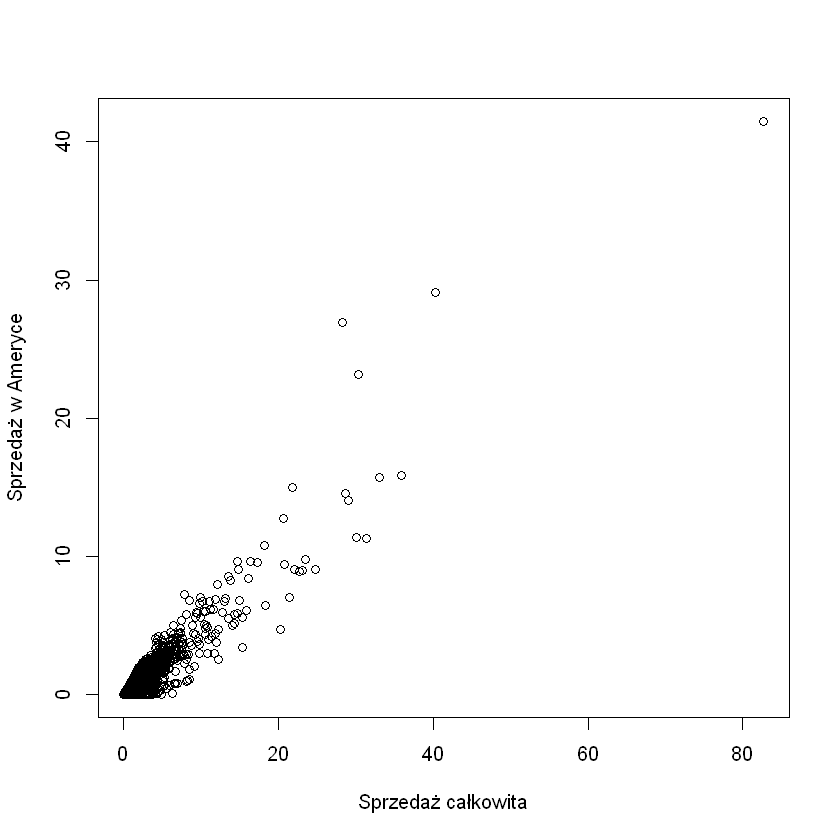

In [100]:
x1 <- file$Global_Sales
x2 <- file$NA_Sales
plot(x1,x2,xlab = "Sprzedaż całkowita",ylab="Sprzedaż w Ameryce")

Powyższy wykres bardzo wyraźnie obrazuje nam prostą zależność - sprzedaż całkowita jest zależna od sprzedaży w Ameryce.

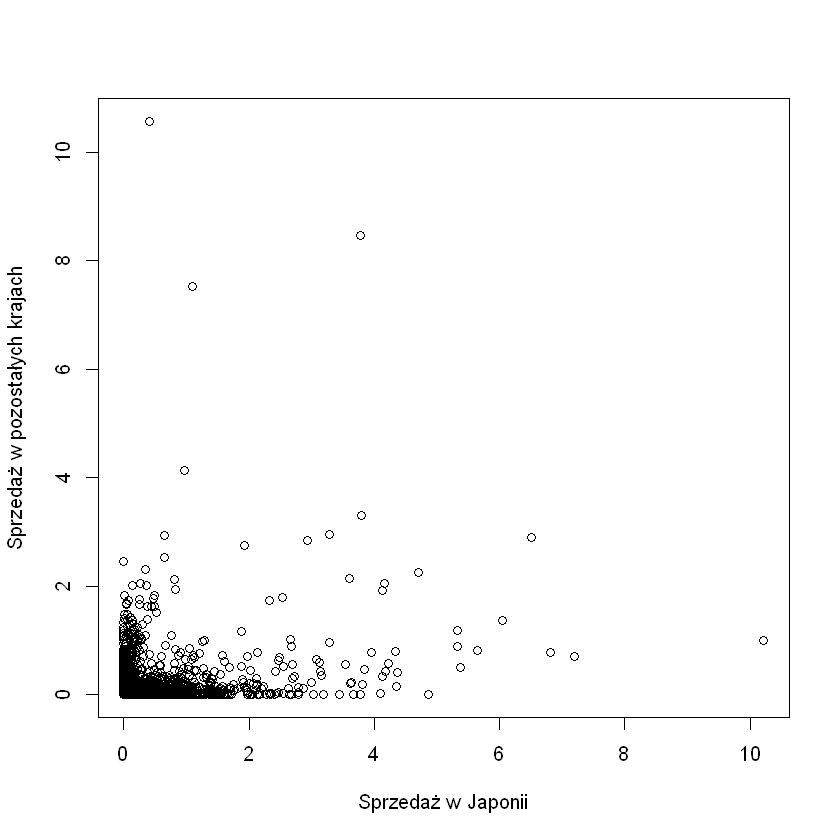

In [101]:
y1 <- file$JP_Sales
y2 <- file$Other_Sales
plot(y1,y2,xlab="Sprzedaż w Japonii",ylab="Sprzedaż w pozostałych krajach")

Powyższy wykres przedstawia zależność sprzedaży w Japonii do pozostałych krajów. Możemy zauważyć, że im wyższa sprzedaż w Japonii, tym niższa sprzedaż w pozostałych krajach (i odwrotnie).

<big> <big> 4. Podsumowanie 

Zanalizowane właśnie dane przedstawiają głównie zależności dotyczące sprzedaży w różnych krajach - zawierają dodatkowo informację chociażby o roku wydania, co pozwala sprawdzić które lata były dla gier wideo najlepsze. Niestety duża ilość zbioru jest podana tekstowo - z informacji o platformach czy gatunkach nie wyciągniemy niewiele więcej, niż informacja o najbardziej i najmniej popularnych. Podsumowując, dane są dość jednowymiarowe - zawierają głównie informacje o sprzedaży, jednak są to wiadomości szczegółowe i w bardzo dużych ilościach, co pozwala na dokładne określenie zależności pomiędzy konkretnymi wartościami. Warto byłoby wzbogacić je w przyszłości o informacje dotyczące chociażby popularności gry na przestrzeni lat, co pozwoliłoby na wyciągnięcie wielu ciekawych wniosków.